In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# DATASET
data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

print('Class label counts: ', np.bincount(y))
print('X.shape: ', X.shape)
print('Y.shape: ', y.shape)

Class label counts:  [50 50]
X.shape:  (100, 2)
Y.shape:  (100,)


In [3]:
# Shuffling and train/test data split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(42)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

In [4]:
# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

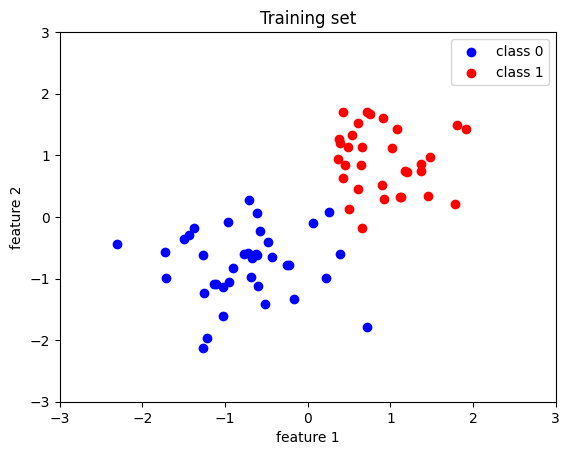

In [5]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='b', label='class 0')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r', label='class 1')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='upper right')
plt.show()

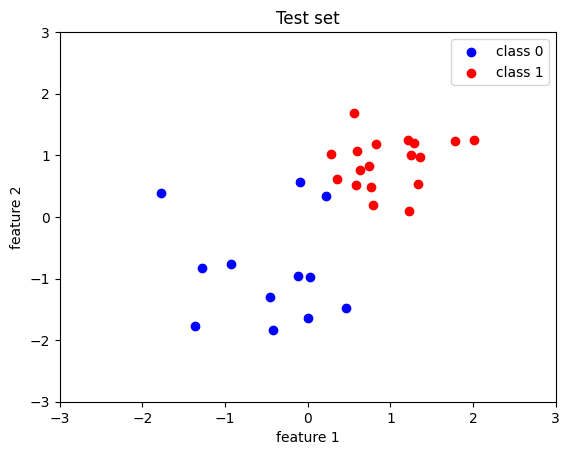

In [6]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='b', label='class 0')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='r', label='class 1')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='upper right')
plt.show()

**Defining the Perceptron**

In [7]:
class Perceptron():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features, 1), dtype=float)
    self.bias = np.zeros(1, dtype=float)

  def forward(self, x):
    linear = np.dot(x, self.weights) + self.bias # comp. net input
    predictions = np.where(linear > 0., 1, 0)
    return predictions

  def backward(self, x, y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors

  def train(self, x, y, epochs):
    for e in range(epochs):
      wrong_predictions = 0
      for i in range (y.shape[0]):
        errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
        if errors.sum() != 0:
          wrong_predictions += 1
        self.weights += (errors * x[i]).reshape(self.num_features, 1)
        self.bias += errors
      print(f"Epoch {e+1}: Number of wrongly predicted training examples: {wrong_predictions}")

  def evaluate(self, x, y):
    predictions = self.forward(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

**Training the Perceptron**

In [8]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters: \n')
print('Weights: %s\n' % ppn.weights)
print('Bias: %s\n' % ppn.bias)

Epoch 1: Number of wrongly predicted training examples: 3
Epoch 2: Number of wrongly predicted training examples: 2
Epoch 3: Number of wrongly predicted training examples: 2
Epoch 4: Number of wrongly predicted training examples: 2
Epoch 5: Number of wrongly predicted training examples: 2
Model parameters: 

Weights: [[1.74646619]
 [1.99916913]]

Bias: [-1.]



**Evaluating the Model**

In [9]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test accuracy: %.3f%%' % (test_acc*100))

Test accuracy: 96.667%


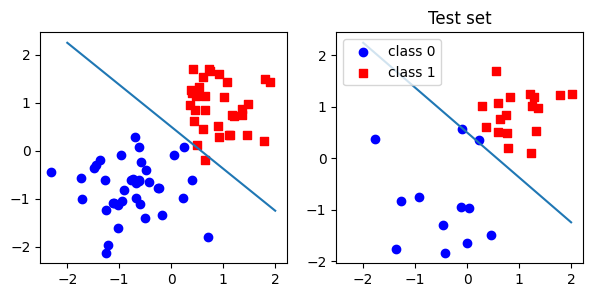

In [10]:
## 2D Decision Boundary

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ((-(w[0] * x0_min) - b[0]) / w[1])

x0_max = 2
x1_max = ((-(w[0] * x0_max) - b[0]) / w[1])

# x0 * w0 + x1 * w1 + b = 0
# x1 = (-x0 * w0 - b) / w1

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7,3))
ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='b', label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r', label='class 1', marker='s')


ax[1].scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='b', label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='r', label='class 1', marker='s')


ax[1].legend(loc='upper left')
plt.show()

**Modifying the code to not shuffle the data**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DATASET
data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

# print('Class label counts: ', np.bincount(y))
# print('X.shape: ', X.shape)
# print('Y.shape: ', y.shape)

# # Shuffling the data set
# shuffle_idx = np.arange(y.shape[0])
# shuffle_rng = np.random.RandomState(42)
# shuffle_rng.shuffle(shuffle_idx)
# X, y = X[shuffle_idx], y[shuffle_idx]

# Split the train/test data split
X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma


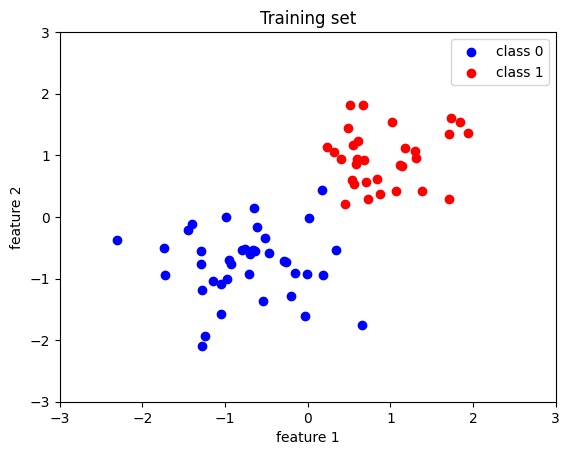

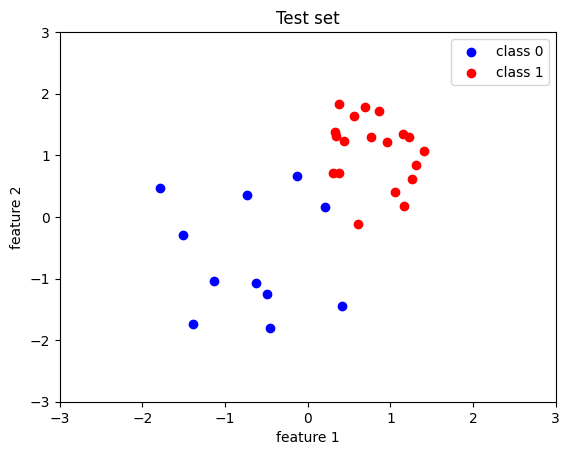

In [17]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='b', label='class 0')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r', label='class 1')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='upper right')
plt.show()

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='b', label='class 0')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='r', label='class 1')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='upper right')
plt.show()

In [13]:
class Perceptron():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features, 1), dtype=float)
    self.bias = np.zeros(1, dtype=float)

  def forward(self, x):
    linear = np.dot(x, self.weights) + self.bias # comp. net input
    predictions = np.where(linear > 0., 1, 0)
    return predictions

  def backward(self, x, y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors

  def train(self, x, y, epochs):
    for e in range(epochs):
      wrong_predictions = 0
      for i in range (y.shape[0]):
        errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
        if errors.sum() != 0:
          wrong_predictions += 1
        self.weights += (errors * x[i]).reshape(self.num_features, 1)
        self.bias += errors
      print(f"Epoch {e+1}: Number of wrongly predicted training examples: {wrong_predictions}")

  def evaluate(self, x, y):
    predictions = self.forward(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

In [14]:
# Increase the number of epochs to 10
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=10)

print('Model parameters: \n')
print('Weights: %s\n' % ppn.weights)
print('Bias: %s\n' % ppn.bias)

Epoch 1: Number of wrongly predicted training examples: 3
Epoch 2: Number of wrongly predicted training examples: 2
Epoch 3: Number of wrongly predicted training examples: 2
Epoch 4: Number of wrongly predicted training examples: 2
Epoch 5: Number of wrongly predicted training examples: 0
Epoch 6: Number of wrongly predicted training examples: 0
Epoch 7: Number of wrongly predicted training examples: 0
Epoch 8: Number of wrongly predicted training examples: 0
Epoch 9: Number of wrongly predicted training examples: 0
Epoch 10: Number of wrongly predicted training examples: 0
Model parameters: 

Weights: [[1.88902042]
 [1.49580433]]

Bias: [-1.]



In [15]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test accuracy: %.3f%%' % (test_acc*100))

Test accuracy: 96.667%


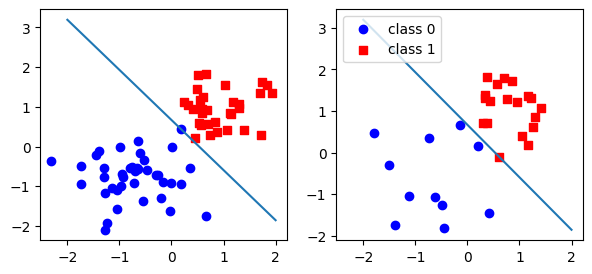

In [16]:
## 2D Decision Boundary

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ((-(w[0] * x0_min) - b[0]) / w[1])

x0_max = 2
x1_max = ((-(w[0] * x0_max) - b[0]) / w[1])

# x0 * w0 + x1 * w1 + b = 0
# x1 = (-x0 * w0 - b) / w1

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7,3))
ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='b', label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r', label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='b', label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='r', label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()